Hi Daniel. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. You're almost there!
    
## Review v. 2<a class="tocSkip">
    
Unfortunately, you received an incomplete review due to technical problems on the server :(
    
Congratulations! Your project now is perfect. Your project has been accepted and you can go to the next sprint! Well done!

<div class='alert alert-info'><b>Student comment v. 2:</b><br />
Hey Svetlana! <br />
I appreciate your work in reviewing this project, I've mistakenly uploaded the wrong version of it, <br />
and would like to get your opinion on a couple of points. <br />
I'm adding links for your convenience: <br /> 
&nbsp;&nbsp;1. <a href="#v2-dup_elim">Duplicates elimination</a>  <br />
&nbsp;&nbsp;2. <a href="#v2-an_conc">Analysis conclusions</a>  <br />
&nbsp;&nbsp;3. <a href="#v2-gen_conc">General conclusions</a>  <br />
    
Thank you! :)
</div>

## Review v. 3<a class="tocSkip">



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
plt.rcParams['figure.figsize'] = (13,9)

In [3]:
!pip install -q --user --upgrade pandas
!pip install -q --user --upgrade matplotlib-venn
!pip install -q --user --upgrade seaborn

## Chicago area taxis and weather
***
##### commissioned by: "Zuber" - ride sharing

The purpose of this report is to find patterns of usage, and understand passenger preferences.  
To do so, we will draw information from the internet regarding the weather,  
and further cross-reference and extrapolate from the analysis of Chicago taxi companies' data of November 2017:
* load, clean and filter data
* conduct exploratory data analysis
* test hypotheses
* draw conclusions

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you formulated a goal of the project.
</div>

<a class="anchor" id="0_toc"></a>
# Table of Contents
***

1. [EDA](#1-eda)
    1. [Taxi companies](#1-companies)
    2. [Destination neighborhoods](#1-destinations)
    <br />[Conclusions](#1-eda_conclusions)
2. [Hypothesis](#2-hypothesis)
    1. [Load and Preprocess data](#2-data)
    2. [Analysis](#2-analysis)
    3. [Hypothesis testing](#2-hypothesis_test)
    <br />[Conclusions](#2-hypothesis_conclusions)
3. [Conclusions](#3-conclusions)

<div class='alert alert-info'><b>Student comment:</b><br />
Previous steps (parse weather data from web source, and SQL queries), were performed beforehand on the online platform.  <br />
CSV files are the results of these queries.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

In [4]:
def load_file(file):
    """Returns a parsed DataFrame"""
    
    print(f'Loading {file}..')

    filepath = f'/datasets/{file}'
    if not os.path.isfile(filepath):
        filepath = file

    return pd.read_csv(filepath)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using docstrings. It's helpful :)
</div>

<a class="anchor" id="1-eda"></a>
## Exploratory data analysis
***
[back to Table of Contents](#0_toc)
1. [Taxi companies](#1-companies)
2. [Destination neighborhoods](#1-destinations)
<br />[Conclusions](#1-eda_conclusions)

In [5]:
df1 = load_file('project_sql_result_01.csv')
df2 = load_file('project_sql_result_04.csv')

Loading project_sql_result_01.csv..
Loading project_sql_result_04.csv..


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded.
</div>

In [6]:
display(
    df1.sample(2),
    df2.sample(2))

,company_name,trips_amount
43,2809 - 95474 C & D Cab Co Inc.,29
7,Sun Taxi,7701


,dropoff_location_name,average_trips
48,Austin,44.433333
25,Irving Park,296.566667


<a class="anchor" id="1-companies"></a>
### Chicago cab companies rides, November 15-16, 2017
[up](#1-eda)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


There are no missing values, and data types are in order.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have problem with a missing values.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check data for duplicates?
</div>

In [8]:
lower_case_company_names = df1['company_name'].str.casefold()

In [9]:
lower_case_company_names.duplicated().sum()

0

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You are right, there is no duplicates in our data.
</div>

<a class="anchor" id="v2-dup_elim"></a>
<div class='alert alert-info'><b>Student comment v. 2:</b><br />
In the next couple of code cells (10-12), I've attempted to manually detect duplicated company names, <br />
beyond what is possible with a simple duplicated() check. <br />
I've spotted possible candidates, looked up info on the internet and decided which companies should be combined into a single entry. <br />
This process is error-prone, and I am not 100% confident that my conclusions are correct. <br /> 
Is this a valid approach in a real-world scenario, working as an analyst? <br />
Is such an approach reasonable, and does it fit this specific case?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Preprocessing string duplicates is usually consists os several steps:
    
1. Converting string to the lower case.
    
2. Deleting special characters.
    
3. Removing different spelling of the same names (synonyms).
    
In general there is no generic method. Please note that regular expressinons and NLP methods can be useful here.
    
Please see for details: https://docs.python.org/3/howto/regex.html, https://towardsdatascience.com/text-normalization-7ecc8e084e31, https://www.linguamatics.com/guide-choosing-right-natural-language-processing-solution, https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
</div>

In [10]:
display(lower_case_company_names.sort_values().unique())
print('Count:', lower_case_company_names.nunique())

array(['0118 - 42111 godfrey s. awir', '1085 - 72312 n and w cab co',
       '1469 - 64126 omar jada', '2092 - 61288 sbeih company',
       '2192 - 73487 zeymane corp', '2241 - 44667 - felman corp',
       '24 seven taxi', '2733 - 74600 benny jona',
       '2809 - 95474 c & d cab co inc.', '2823 - 73307 lee express inc',
       '3011 - 66308 jbl cab inc.', '303 taxi',
       '3556 - 36214 rc andrews cab', '3591 - 63480 chuks cab',
       '3620 - 52292 david k. cab corp.',
       '3623 - 72222 arrington enterprises', '3721 - santamaria express',
       '4053 - 40193 adwar h. nikola', '4615 - 83503 tyrone henderson',
       '4623 - 27290 jay kim', '5 star taxi', '5006 - 39261 salifu bawa',
       '5062 - 34841 sam mestas', '5074 - 54002 ahzmi inc',
       '5874 - 73628 sergey cab corp.', '5997 - 65283 aw services inc.',
       '6057 - 24657 richard addo', '6574 - babylon express inc.',
       '6742 - 83735 tasha ride inc', '6743 - 78771 luhak corp',
       'american united', 'american un

Count: 64


Potential duplicate values spotted for 'company_name':  
- ‘Checker Taxi Affiliation’, ‘Checker Taxi’
- ‘Medallion Leasing‘, ‘Chicago Medallion Management’,  ‘Chicago Medallion Leasing INC’
- ‘Taxi Affiliation Services’, ‘Taxi Affiliation Service Yellow’

To understand whether these names are really duplicates, or just very similar, we need to contact the party responsible for this data.  
In the case this is not possible, we can try to conduct own research, utilizing various sources: 
- Google
- https://opengovus.com/chicago-business
- https://www.chicago.gov/content/dam/city/depts/bacp/publicvehicleinfo/affiliationlicbrokermanager/TaxicabLicenseManagerList632016.pdf
- https://www.chicago.gov/content/dam/city/depts/bacp/publicvehicleinfo/medallionowners/chicagotaxiaffiliationcontactlist2021jan25.pdf
- https://www.yellowpages.com/chicago-il/taxis
- https://www.negup.com/taxi-directory/us/city/chicago/

After searching for the potential values, these are the conclusions:
- ‘Checker Taxi Affiliation’, ‘Checker Taxi’  
\- same company. renaming to ‘Checker Taxi Affiliation’.
<br><br>
- ‘Medallion Leasing‘, ‘Chicago Medallion Management’,  ‘Chicago Medallion Leasing INC’  
\- ‘Medallion Leasing‘, ‘Chicago Medallion Leasing INC’ - same company. renaming to ‘Chicago Medallion Leasing INC’.  
\- ‘Chicago Medallion Management’ - different company.
<br><br>
- ‘Taxi Affiliation Services’, ‘Taxi Affiliation Service Yellow’  
\- same company. renaming to ‘Taxi Affiliation Services’

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
It's a really great job that you clearly analysed possible duplicates in the companies names.
</div>

In [11]:
def eliminate_duplicate_companies(row, lowercase_name):
    """Check for predefined similar names, and normalize. Returns the modified row."""
    
    company_name = lowercase_name.iloc[row.name]
    # print(row.name, row, company_name)
    
    if 'checker' in company_name:
        row['company_name'] = 'Checker Taxi Affiliation'
    elif 'medallion' in company_name:
        if 'leasing' in company_name:
            row['company_name'] = 'Chicago Medallion Leasing INC'
        else:
            row['company_name'] = 'Chicago Medallion Management'
    elif 'affiliation' in company_name:
        row['company_name'] = 'Checker Taxi Affiliation'
    
    return row

In [12]:
df1 = (df1
 .apply(lambda row:eliminate_duplicate_companies(row, lower_case_company_names), axis=1)
 .groupby('company_name')
 .sum()
 .sort_values('trips_amount', ascending=False)
 .reset_index())

In [13]:
df1['company_name'].describe()

count                              56
unique                             56
top       6742 - 83735 Tasha Ride Inc
freq                                1
Name: company_name, dtype: object

In [14]:
df1['trips_amount'].describe()

count       56.000000
mean      2451.982143
std       5548.975330
min          2.000000
25%         15.750000
50%         38.000000
75%       1820.000000
max      32141.000000
Name: trips_amount, dtype: float64

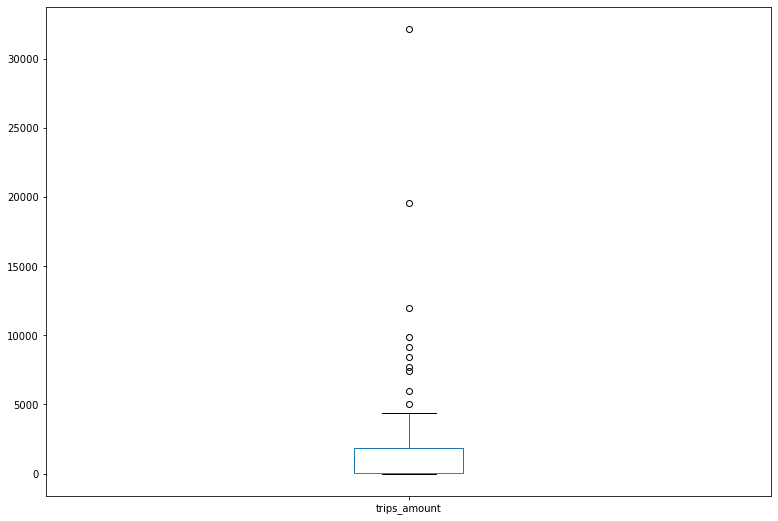

In [15]:
df1['trips_amount'].plot.box();

There are some visible suspected outliers, checking:

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted aproblem with an outliers. 
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain a possible reasons of an anomaly values? 
</div>

The potential anomalies could be explained by:
1. Popularity - people prefer a single brand (taxi company in this case) over others
2. Broader area of service - there may be more drivers (and taxies) for this company, which means more customers and overall trips
3. Technical issue - there may be a technical issue, and thus this value is an error.  
There is no indication that this is the case, since the scale of the number is close to the other values  
\- this needs to be checked with the Data Base Admin responsible for this data.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it can be a technical errors. The situation when people prefer a single brand is common situation and can lead to an anomaly values :)
</div>

In [16]:
df1.nlargest(10, 'trips_amount')

,company_name,trips_amount
0,Checker Taxi Affiliation,32141
1,Flash Cab,19558
2,Chicago Medallion Leasing INC,11974
3,Yellow Cab,9888
4,Chicago Carriage Cab Corp,9181
5,City Service,8448
6,Sun Taxi,7701
7,Star North Management LLC,7455
8,Blue Ribbon Taxi Association Inc.,5953
9,Choice Taxi Association,5015


In [17]:
df1.nsmallest(10, 'trips_amount')[::-1]

,company_name,trips_amount
44,3721 - Santamaria Express,14
47,6057 - 24657 Richard Addo,13
48,5997 - 65283 AW Services Inc.,12
49,Metro Group,11
50,5062 - 34841 Sam Mestas,8
52,2733 - 74600 Benny Jona,7
51,4053 - 40193 Adwar H. Nikola,7
53,5874 - 73628 Sergey Cab Corp.,5
54,2241 - 44667 - Felman Corp,3
55,3556 - 36214 RC Andrews Cab,2


Suspected outliers seem to be legitimate values (same scale), will not be removed.

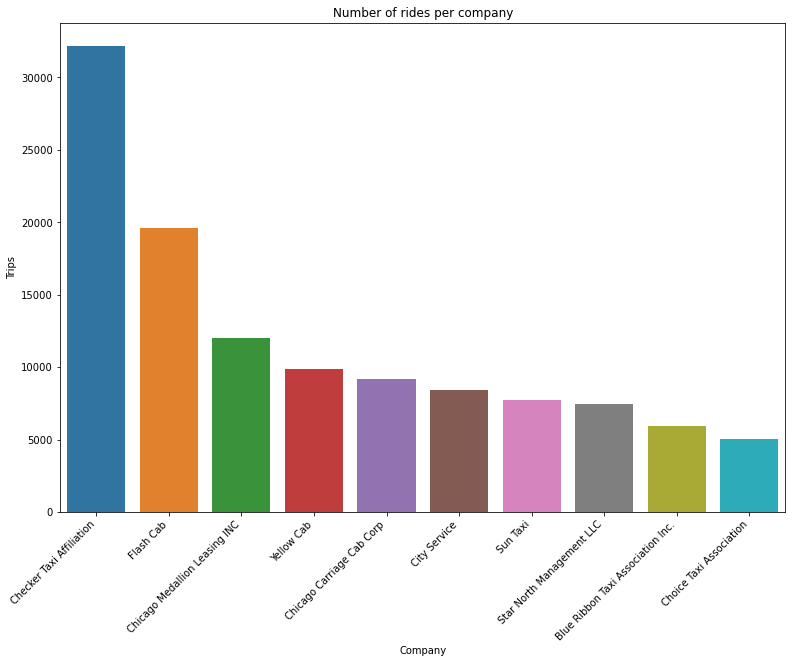

In [18]:
sns.barplot(data=df1.nlargest(10, 'trips_amount'), x='company_name', y='trips_amount')
plt.title('Number of rides per company')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('Trips')
plt.show();

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent graph :) Great that you sorted values on the graph :) This makes it easier to analyze the data.
</div>

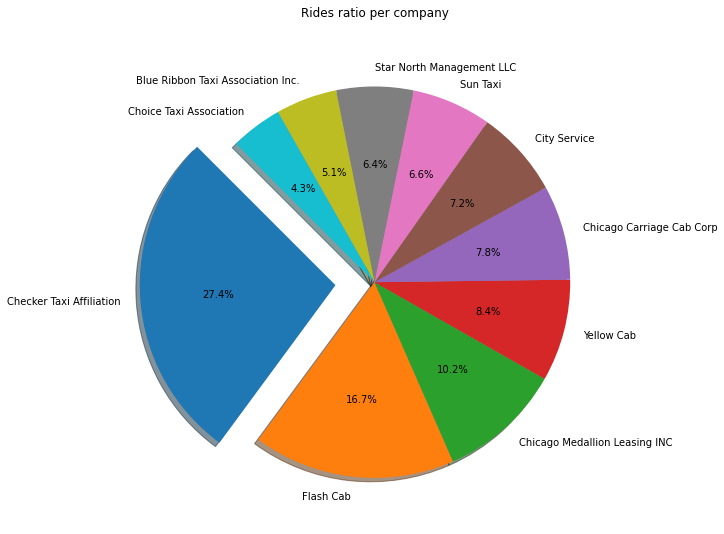

In [19]:
df1.nlargest(10, 'trips_amount').plot.pie(
    y='trips_amount',
    labels=df1['company_name'],
    autopct='%.1f%%',
    explode=[0.2, *np.zeros(9)],
    shadow=True,
    startangle=135,
    legend=None)
plt.ylabel(None)
plt.title('Rides ratio per company\n')
plt.show();

'Checker Taxi Affiliation' have the largest share of rides for November 15-16, 2017, more than 1/4 of the data,  
with 'Flash Cab' far behind it.  
The ratio decreases gradually from the 3rd place on.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right, 'Flash Cab' have the largest share of rides among other companies.
</div>

<div class='alert alert-info'><b>Student comment:</b><br />
After merging detected duplicates, details have changed - and the above message is now irrelevant.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

<a class="anchor" id="1-destinations"></a>
### Chicago neighborhood destinations, November 2017
[up](#1-eda)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


There are no missing values,  
'average_trips' data type can be converted to int.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's necessary to change data type for 'average_trips' column.
</div>

In [21]:
df2['average_trips'] = df2['average_trips'].astype('int')

In [22]:
df2['dropoff_location_name'].describe()

count              94
unique             94
top       Avalon Park
freq                1
Name: dropoff_location_name, dtype: object

In [23]:
df2['dropoff_location_name'].duplicated().sum()

0

In [24]:
df2['dropoff_location_name'].str.casefold().sort_values().unique()

array(['albany park', 'andersonville', 'archer heights', 'armour square',
       'ashburn', 'auburn gresham', 'austin', 'avalon park', 'avondale',
       'belmont cragin', 'beverly', 'boystown', 'bridgeport',
       'brighton park', 'bucktown', 'burnside', 'calumet heights',
       'chatham', 'chicago lawn', 'chinatown', 'clearing', 'douglas',
       'dunning', 'east side', 'east village', 'edgewater', 'edison park',
       'englewood', 'fuller park', 'gage park', 'garfield park',
       'garfield ridge', 'gold coast', 'grand boulevard',
       'grand crossing', 'grant park', 'hegewisch', 'hermosa',
       'humboldt park', 'hyde park', 'irving park', 'jackson park',
       'jefferson park', 'kenwood', 'lake view', 'lincoln park',
       'lincoln square', 'little italy, uic', 'little village',
       'logan square', 'loop', 'lower west side', 'mckinley park',
       'montclare', 'morgan park', 'mount greenwood', 'museum campus',
       'near south side', 'new city', 'north center', 'nor

There are no duplicated 'dropoff_location_name' values.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you checked data for duplicates.
</div>

In [25]:
df2['average_trips'].describe()

count       94.000000
mean       599.478723
std       1714.555974
min          1.000000
25%         14.000000
50%         51.500000
75%        298.750000
max      10727.000000
Name: average_trips, dtype: float64

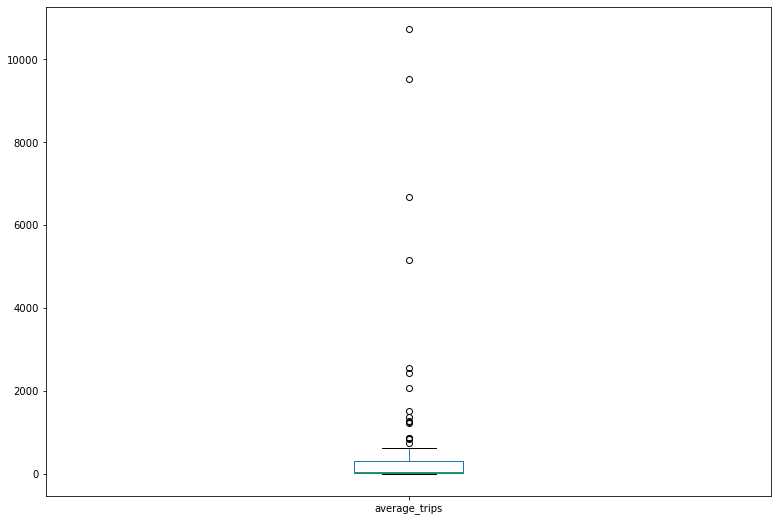

In [26]:
df2['average_trips'].plot.box();

There are some visible suspected outliers, checking:

In [27]:
df2.nlargest(10, 'average_trips')

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [28]:
df2.nsmallest(10, 'average_trips')[::-1]

,dropoff_location_name,average_trips
83,Avalon Park,6
86,West Elsdon,5
85,Montclare,5
90,Hegewisch,3
89,Mount Greenwood,3
88,Undef,3
87,Pullman,3
91,Burnside,2
93,Riverdale,1
92,East Side,1


Suspected outliers are legitimate values (same scale), will not be removed.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable decision :)
</div>

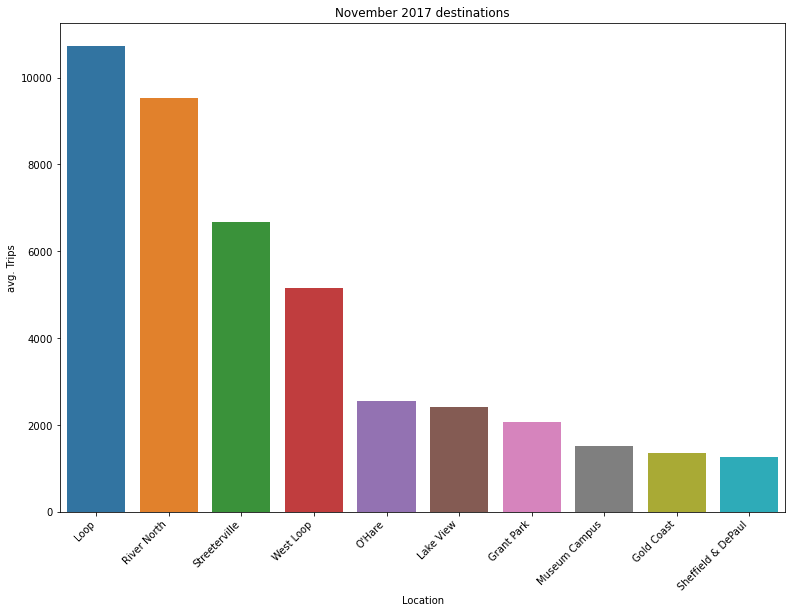

In [29]:
sns.barplot(data=df2.nlargest(10, 'average_trips'), x='dropoff_location_name', y='average_trips')
plt.title('November 2017 destinations')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('avg. Trips')
plt.show();

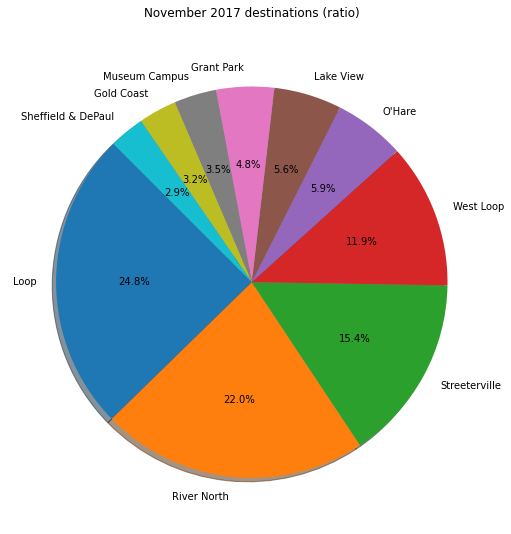

In [30]:
df2.nlargest(10, 'average_trips').plot.pie(
    y='average_trips',
    labels=df2['dropoff_location_name'],
    autopct='%.1f%%',
    shadow=True,
    startangle=135,
    legend=None)
plt.ylabel(None)
plt.title('November 2017 destinations (ratio)\n')
plt.show();

4 neighborhoods constitute almost 75% of November's drop-off locations:
* Loop
* River North
* Streetville
* West Loop  

The rest's shares are gradually decreasing, starting from the 5th position.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent analysis :) I recommend compare the number of rides for these locations. Do you have any idea why these neighborhoods are so popular?
</div>

<a class="anchor" id="v2-an_conc"></a>
<div class='alert alert-info'><b>Student comment v. 2:</b><br />
I've uploaded an incorrect version of the notebook, <br />
below are the updated conclusions (for neighborhoods, and in general for this section a cell below that).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Ok :)
</div>

Possible explanations for these locations:
- High profile locations (Loop - downtown: restaurants, clubs, etc..)
- Wealthy neighborhood (River North)
- Tourist Attractions (Streetville: museums, parks... - West Loop: Greektown, art galleries...)
- Airport (O'Hare)

\- source: https://www.choosechicago.com/neighborhoods/loop/

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, the main reasons of popularity of these locations are correctly defined. Well done!
    
We also can conclude that clients mainly prefer crowded places with a large number of different establishments. It looks like people in the rich region prefer to use taxi.
</div>

<a class="anchor" id="1-eda_conclusions"></a>
### Conclusions
[up](#1-eda)

<!-- Most of the companies have a similar share of the pie, with a slight exception - 'Flash Cab'.  
To gain more insight, and explore correlation of companies to drop-off locations, additional data is required:
* Outreach of companies (geospatial)
* Number of drivers, cross-referenced with shift hours
* Customer opinions and taxi apps' reviews -->

There are 3 major competitors:
- 'Checker Taxi Affiliation' - 27.4%
- 'Flash Cab' - 16.7%
- 'Chicago Medallion Leasing Inc.' - 10.2%  

The rest of the companies have decreasing shares ('Yellow Cab' with 8.4% and below).  
To gain more insight, and explore correlation of companies to drop-off locations, additional data is required:
* Outreach of companies (geospatial)
* Number of drivers, cross-referenced with shift hours
* Customer opinions and taxi apps' reviews 
<br>
<br>

There are 5 main destinations:
* Loop
* River North
* Streetville
* West Loop  
* O'Hare

First 4 constitute 75% of the data.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, you correctly chose the most popular companies and 5 top 5 locations.
</div>

<a class="anchor" id="2-hypothesis"></a>
## Hypothesis
***
[back to Table of Contents](#0_toc)
1. [Load and Preprocess data](#2-data)
2. [Analysis](#2-analysis)
3. [Hypothesis testing](#2-hypothesis_test)
<br />[Conclusions](#2-hypothesis_conclusions)

<a class="anchor" id="2-data"></a>
### Load file and preprocess
[up](#2-hypothesis)

In [31]:
df = load_file('project_sql_result_07.csv')
df.sample(2)

Loading project_sql_result_07.csv..


,start_ts,weather_conditions,duration_seconds
625,2017-11-04 16:00:00,Bad,3540.0
903,2017-11-11 13:00:00,Good,2148.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [33]:
df.nunique()

start_ts               81
weather_conditions      2
duration_seconds      495
dtype: int64

In [34]:
df.describe(include='object')

,start_ts,weather_conditions
count,1068,1068
unique,81,2
top,2017-11-11 10:00:00,Good
freq,48,888


In [35]:
df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


There are no missing values.  

Converting data types:
* start_ts -> datetime
* weather_conditions -> boolean (+ rename to 'is_good_weather')
* duration_seconds -> int

In [36]:
df['start_ts'] = pd.to_datetime(df['start_ts'])

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you have changed 'start_ts' column to the correct data type.
</div>

In [37]:
df['is_good_weather'] = df['weather_conditions'].map({'Good': True, 'Bad': False})
df.drop('weather_conditions', inplace=True, axis=1)

In [38]:
df['duration_seconds'] = df['duration_seconds'].astype('int')

In [39]:
display(df.sample())
df.info()

,start_ts,duration_seconds,is_good_weather
820,2017-11-04 16:00:00,2903,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   start_ts          1068 non-null   datetime64[ns]
 1   duration_seconds  1068 non-null   int64         
 2   is_good_weather   1068 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(1)
memory usage: 17.9 KB


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check data for duplicates.
</div>

In [40]:
df.duplicated().sum()

197

It may seem that there are potentially duplicated values,  
but when considering that table represents customer trips,  
it is reasonable that different costumers had the same attributes - start time, weather and trip duration.  

Since there is no 'customer id' identifier, we can't know for sure if these values are duplicates or not.  
Assuming these are unique entries.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, a reasonable dicision :)
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Are there any anomalies in data? 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
AN excellent analysis and explanations :) 
</div>

In [41]:
df['start_ts'].dt.date.value_counts()

2017-11-11    426
2017-11-04    367
2017-11-18    180
2017-11-25     95
Name: start_ts, dtype: int64

All dates are within a reasonable range. no outliers.

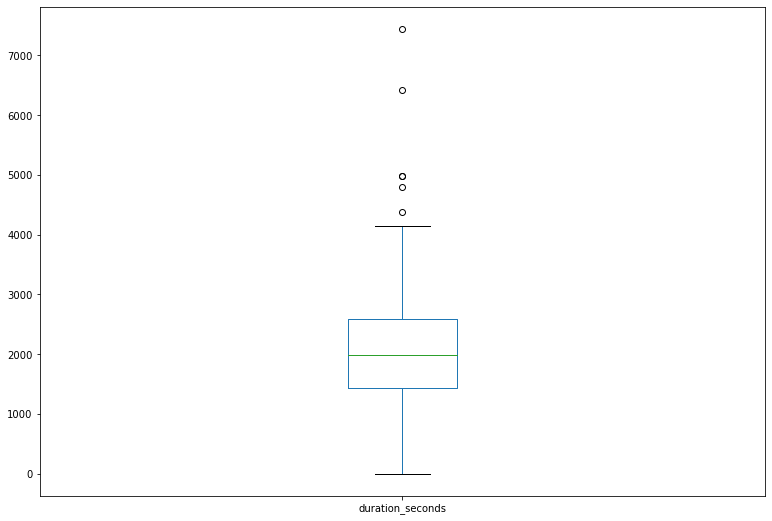

In [42]:
df['duration_seconds'].plot.box();

In [43]:
df['duration_seconds'].sort_values(ascending=False).head(10)

354    7440
619    6420
276    4980
583    4980
79     4800
646    4380
353    4140
110    4044
798    3982
304    3900
Name: duration_seconds, dtype: int64

'duration_seconds' potential outliers are within reasonable range.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Ok :)
</div>

<a class="anchor" id="2-analysis"></a>
### Analysis
[up](#2-hypothesis)

In [44]:
pivot = df.pivot_table(
    index=[df['start_ts'].dt.day, 'is_good_weather'],
    values='duration_seconds',
    aggfunc='count',
    margins=True)
pivot['ratio'] = round(pivot['duration_seconds'] / pivot['duration_seconds']['All'].values[0], 2)
pivot = pivot.reset_index()
pivot.columns = ['day', 'is_good_weather', 'count', 'ratio']
pivot = pivot.set_index(['day', 'is_good_weather'])
pivot

count  ratio
day is_good_weather              
4   False               80   0.07
    True               287   0.27
11  True               426   0.40
18  False              100   0.09
    True                80   0.07
25  True                95   0.09
All                   1068   1.00

Data contains less rainy days than non-rainy ones.

In [45]:
df.corr()

,duration_seconds,is_good_weather
duration_seconds,1.000000,-0.208092
is_good_weather,-0.208092,1.000000


There is no correlation between duration of ride and weather.

In [46]:
print(
    df['start_ts'].dt.day.unique(),
    df['start_ts'].dt.day_name().unique())

[25  4 11 18] ['Saturday']


All days are saturdays, of November 2017.

In [47]:
pd.concat([
    df['is_good_weather'],
    pd.get_dummies(df['start_ts'].dt.day)
], axis=1).corr().iloc[0][1:].to_frame()

,is_good_weather
4,-0.095569
11,0.366747
18,-0.465465
25,0.140681


Correlation of ride's day and weather:  
There seems to be a weak negative correlation for the 18th, and no correlation for other days.  
Exploring further visually.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to use a correlation function.
</div>

In [48]:
# avg_ride_duration_by_weather = df.groupby('is_good_weather').mean().reset_index()

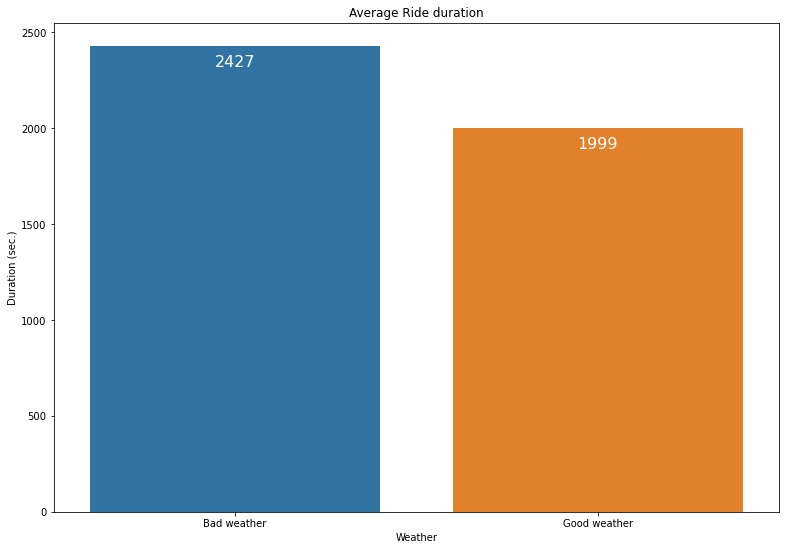

In [49]:
ax = sns.barplot(data=df, x='is_good_weather', y='duration_seconds', ci=False)
plt.title('Average Ride duration')
plt.xticks([0,1], ['Bad weather', 'Good weather'])
plt.xlabel('Weather')
plt.ylabel('Duration (sec.)')

# for index, row in weather_groups.iterrows():
#     ax.text(index, row['duration_seconds'], round(row['duration_seconds'],2), color='black', ha="center", size=14)
    
for i, bar in enumerate(ax.patches):
    ax.annotate(int(bar.get_height()), 
           (bar.get_x() + bar.get_width() / 2, 
            bar.get_height()), ha='center', va='center',
           size=16, xytext=(0, -16),
           textcoords='offset points', color='white')

plt.show();

Average duration differs, but not by much.

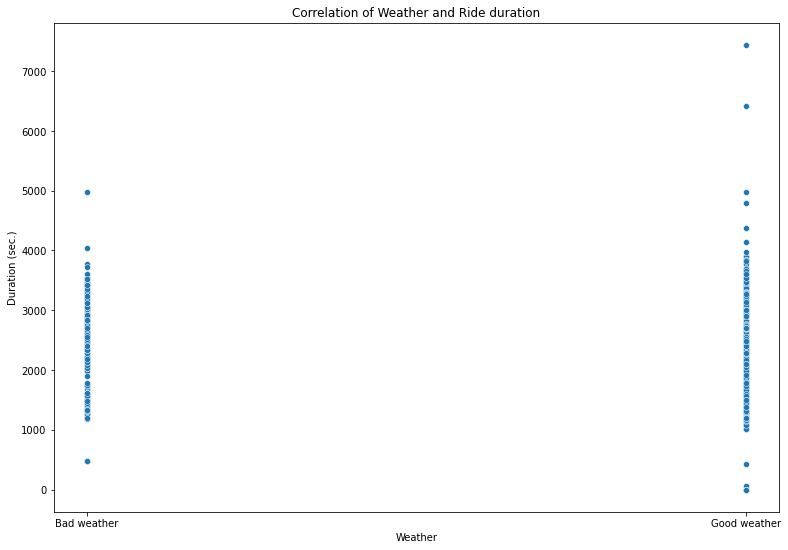

In [50]:
sns.scatterplot(data=df, x='is_good_weather', y='duration_seconds');
plt.title('Correlation of Weather and Ride duration');
plt.xticks([0,1], ['Bad weather', 'Good weather'])
plt.xlabel('Weather')
plt.ylabel('Duration (sec.)')
plt.show();

Dispersion looks similar.  
Checking by Date:

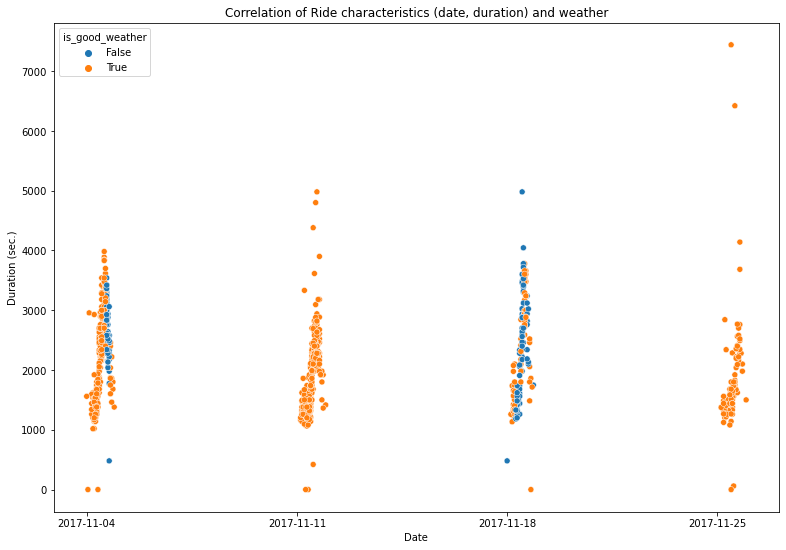

In [51]:
sns.scatterplot(data=df, x='start_ts', y='duration_seconds', hue='is_good_weather')
plt.title('Correlation of Ride characteristics (date, duration) and weather');
plt.xticks(df['start_ts'].dt.date.unique())
plt.xlabel('Date')
plt.ylabel('Duration (sec.)')
plt.show();

Zooming in:

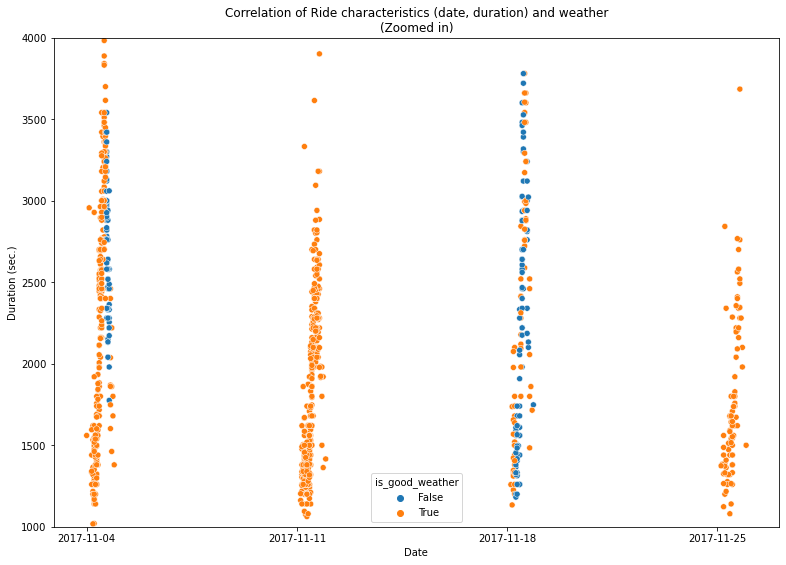

In [52]:
sns.scatterplot(data=df, x='start_ts', y='duration_seconds', hue='is_good_weather')
plt.ylim(1000,4000)
plt.title('Correlation of Ride characteristics (date, duration) and weather\n(Zoomed in)');
plt.xticks(df['start_ts'].dt.date.unique())
plt.xlabel('Date')
plt.ylabel('Duration (sec.)')
plt.show();

Seems to be raining every other week,  
Dispersion looks similar between rainy and non-rainy rides' durations.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you added visualization of bad and good weather (histograms to see distributions clearly).
</div>

<a class="anchor" id="2-hypothesis_test"></a>
### Hypothesis testing
[up](#2-hypothesis)

In [53]:
def test_student_t(df, equal_var=True, alpha=.05):
    """Calculate the T-test for the means of *two independent* samples of scores."""
    
    groups = [v for k,v in list(df)]
    
    results = st.ttest_ind(groups[0], groups[1], equal_var=equal_var)
    print(f'p-value: {results.pvalue}\nis p-value < alpha ?\n\t{results.pvalue < alpha}')

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [54]:
def test_levene(df, center, alpha=.05, **kwargs):
    """Perform Levene test for equal variances."""
    
    groups = [v for k,v in list(df)]
    
    results = st.levene(groups[0], groups[1], center=center, **kwargs)
    print(f'p-value: {results.pvalue}\nis p-value < alpha ?\n\t{results.pvalue < alpha}')

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [55]:
df_duration_weather = df.iloc[:,1:].groupby('is_good_weather')
df_duration_weather.obj.head(2)

,duration_seconds,is_good_weather
0,2410,True
1,1920,True


#### Variances

In [56]:
df_duration_weather.var()

,duration_seconds
is_good_weather,
False,520294.086002
True,576382.009690


Checking whether the difference of variance is statistically significant:

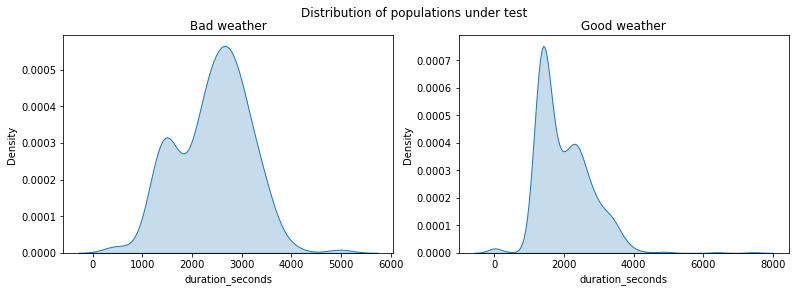

In [57]:
titles_map = {True: 'Good weather', False: 'Bad weather'}
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
for i, (name, group) in enumerate(df_duration_weather):
    ax = axes[i]
    ax.set_title(titles_map[name])
    sns.kdeplot(data=group, x='duration_seconds', ax=ax, fill=True)
plt.suptitle('Distribution of populations under test')
plt.show();

The distributions look different.  
Performing Levene test for variance equality, using center='median' as per documentation:  
"‘median’ : Recommended for skewed (non-normal) distributions"

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you added visualization of bad and good weather. We can see a differences in distributions, but it's necessary to check it by statistical test.
</div>

In [58]:
test_levene(df_duration_weather['duration_seconds'], center='median')

p-value: 0.5332038671974493
is p-value < alpha ?
	False
We can't reject the null hypothesis


Result suggests that the populations do have equal variances.  
Setting equal_var=True.

#### Hypothesis formulation

Testing for equality of the average duration of rides from November 2017, for rainy and non-rainy Saturdays.

null hypothesis: The average duration of rides on Rainy and Non-rainy Saturdays is equal.  
alternative hypothesis: The average duration of rides on Rainy and Non-rainy Saturdays differs.

$$H_0: \mu_{\text{Rainy Sat.}} = \mu_{Non-rainy Sat.}$$
$$H_A: \mu_{\text{Rainy Sat.}} \neq \mu_{Non-rainy Sat.}$$
$$\text{Significance level } \alpha = 0.05$$

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, hypotheses formulation is correct :)
</div>

In [59]:
test_student_t(df_duration_weather['duration_seconds'], equal_var=True, alpha=.5)

p-value: 6.517970327099473e-12
is p-value < alpha ?
	True
We reject the null hypothesis


Resulting p-value is less than the .05 threshold  
\- which means result is statistically significant,  
and therefore reject the null hypothesis.

<a class="anchor" id="2-hypothesis_conclusions"></a>
### Conclusions
[up](#2-hypothesis)

Average rides' duration of rainy and non-rainy Saturdays are statistically unlikely to be equal.  
There is a difference between rides' duration of rainy and non-rainy days.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, there is a statistically significant differences.
</div>

<a class="anchor" id="3-conclusions"></a>
## Overall Conclusions
***
[back to Table of Contents](#0_toc)

<a class="anchor" id="v2-gen_conc"></a>
<div class='alert alert-info'><b>Student comment v. 2:</b><br />
I've uploaded an incorrect version of the notebook, <br />
below are the updated general conclusions.
</div>

<!-- Customers use different taxi companies opportunistically, and don’t seem to prefer one over the other.  
That is good - and means they are “up for grabs”.  

4 Neighborhoods make up 75% of all destinations:
* Loop
* River North
* Streetville
* West Loop 

Regarding weather, visual inspected of the data seemed to show no major difference between length of the ride on rainy days vs. on days with nicer weather.  
Upon concluding hypothesis testing, the opposite was revealed:  
There is in fact a siignificant statistical difference between the average ride’s duration between rainy and non rainy days.  
This could be due to various causes related to rain: slower speeds, traffic jams, damaged roads and floods.

To be able to gain more insights, another study has to be done:  
one with more data obtained and further research conducted. -->

There are 3 major competitors (presented with market shares):
- 'Checker Taxi Affiliation' - 27.4%
- 'Flash Cab' - 16.7%
- 'Chicago Medallion Leasing Inc.' - 10.2%

The rest of the companies seem to be used opportunistically, with varying but similar market shares (below 10%). 

4 Neighborhoods make up 75% of all destinations:
* Loop
* River North
* Streetville
* West Loop  

\* O'Hare (5th) being another area of interest, since it contains an Airport.

Regarding weather, visual inspected of the data seemed to show no major difference between length of the ride on rainy days vs. on days with nicer weather.  
Upon concluding hypothesis testing, the opposite was revealed:  
There is in fact a siignificant statistical difference between the average ride’s duration between rainy and non rainy days.  
This could be due to various causes related to rain: slower speeds, traffic jams, damaged roads and floods.

To be able to gain more insights, another study has to be done,  
one with more data obtained and further research conducted, specifically:  
We need to cross reference which companies serve which clientele, with details about pick-up and drop-off locations.  
Then conduct extra research about the preferences and opinions of those clients.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's a really good idea to conduct mode detailed analysis. 👍👍👍
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Great, now your conclusion is perfect :)
</div>